In [5]:
%%bash 
# #Data accessible via: 
# git clone https://huggingface.co/datasets/liminghao1630/API-Bank

In [6]:
import os 
DATA_ROOT = os.path.join('Datasets','API-Bank') 

In [1]:
from datasets import load_dataset

dataset = load_dataset("liminghao1630/API-Bank")

/home/ac-99/miniconda3/envs/tool-learning/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Extracting data files: 100%|██████████| 2/2 [00:00<00:00, 84.92it/s]


DatasetGenerationError: An error occurred while generating the dataset

In [9]:
import pandas as pd
test_dfs = load_jsons_from_dir(os.path.join(DATA_ROOT,'test-data'))
test_df = pd.concat(test_dfs)
test_df['split'] = 'test'

train_dfs = load_jsons_from_dir(os.path.join(DATA_ROOT,'training-data'))
train_df = pd.concat(train_dfs)
train_df['split'] = 'train'

Index(['file', 'id', 'instruction', 'input', 'output'], dtype='object')
dropped file
dropped id
dropped sample_id
dropped api_id
dropped sample_id
dropped api_id
dropped sample_id
dropped api_id
Index(['file', 'id', 'instruction', 'input', 'output'], dtype='object')
dropped file
dropped id
Index(['file', 'id', 'instruction', 'input', 'output'], dtype='object')
dropped file
dropped id
Index(['file', 'id', 'instruction', 'input', 'output'], dtype='object')
dropped file
dropped id


In [10]:
api_df = pd.concat([train_df,test_df],axis=0).reset_index(drop=True)
api_df = api_df.drop_duplicates()
api_df

,instruction,input,output,split
0,\nGenerate a response as an AI assistant based...,"{""apiCode"": ""ToolSearcher"", ""description"": ""Se...",AI: The Blood Pressure Monitor is a medical de...,train
1,\nGenerate a response as an AI assistant based...,"{""apiCode"": ""ToolSearcher"", ""description"": ""Se...",AI: Your telehealth video call appointment wit...,train
2,\nGenerate a response as an AI assistant based...,"{""apiCode"": ""ToolSearcher"", ""description"": ""Se...",AI: Here are the nearby hospitals: 同仁医院 locate...,train
3,\nGenerate a response as an AI assistant based...,"{""apiCode"": ""ToolSearcher"", ""description"": ""Se...","AI: According to our system, the estimated arr...",train
4,\nGenerate a response as an AI assistant based...,"{""apiCode"": ""ToolSearcher"", ""description"": ""Se...","AI: Dr. Li's Clinic is located at 123 Main St,...",train
...,...,...,...,...
34963,\nGenerate a response as an AI assistant based...,User: Can you help me query the meeting detail...,We have successfully authenticated. Now I will...,test
34964,\nGenerate a response as an AI assistant based...,User: Can you help me query the meeting detail...,The meeting information is as follows: Meeting...,test
34965,\nGenerate a response as an AI assistant based...,User: Can you check my account balance?\nAI: S...,"Now that you are authenticated, let me check y...",test
34966,\nGenerate a response as an AI assistant based...,User: Can you check my account balance?\nAI: S...,Your account balance is 682.01 dollars.,test


In [11]:
api_df['query_type'] = api_df['output'].apply(lambda x: 'API_request' if x.startswith('API-Request') else 'AI' if x.startswith('AI') else 'Other')
api_df.groupby(['query_type','split']).count()

instruction  input  output
query_type  split                            
AI          train         6332   6332    6332
API_request test           997    997     997
            train        10368  10368   10368
Other       test           528    528     528

In [12]:
print(api_df.shape[0])
api_df = api_df[api_df['query_type']=='API_request']
print(api_df.shape[0])

18225
11365


In [13]:
api_df['cleaned_output'] = api_df['output'].str.replace("API-Request:","").str.strip()

/tmp/ipykernel_49357/1604213146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  api_df['cleaned_output'] = api_df['output'].str.replace("API-Request:","").str.strip()


In [14]:
api_df['instruction_query_type'] = api_df['instruction'].apply(lambda x: x.split('\n')[1])
api_df.groupby(['instruction_query_type','split']).count()

/tmp/ipykernel_49357/1220582990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  api_df['instruction_query_type'] = api_df['instruction'].apply(lambda x: x.split('\n')[1])


instruction  input  \
instruction_query_type                             split                       
Generate an API request in the format of [ApiNa... test           507    507   
                                                   train         9469   9469   
Generate an API request in the format of [ApiNa... test           245    245   
                                                   train          899    899   
You will be tested on your ability to make mult... test           245    245   

                                                          output  query_type  \
instruction_query_type                             split                       
Generate an API request in the format of [ApiNa... test      507         507   
                                                   train    9469        9469   
Generate an API request in the format of [ApiNa... test      245         245   
                                                   train     899         899   
You will be tested on your ability to make mult... test      245         245   

                                                          cleaned_output  
instruction_query_type                             split                  
Generate an API request in the format of [ApiNa... test              507  
                                                   train            9469  
Generate an API request in the format of [ApiNa... test              245  
                                                   train             899  
You will be tested on your ability to make mult... test              245

In [15]:
import re

def parse_func_calls(input_string):
    pattern = r'\b\w+\([^()]*\)'
    matches = re.findall(pattern, input_string)
    return matches


In [16]:
import tqdm
tqdm.tqdm.pandas()

In [17]:
api_df['function_calls'] = api_df['cleaned_output'].apply(parse_func_calls)


/tmp/ipykernel_49357/229236760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  api_df['function_calls'] = api_df['cleaned_output'].apply(parse_func_calls)


/tmp/ipykernel_49357/601941429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  api_df['number_of_calls'] = api_df['function_calls'].apply(len)


<Axes: >

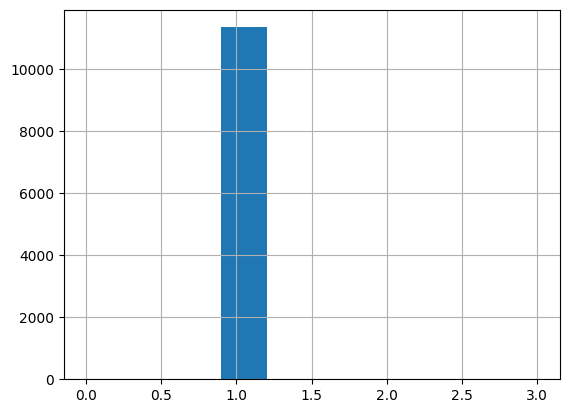

In [18]:
import matplotlib.pyplot as plt
api_df['number_of_calls'] = api_df['function_calls'].apply(len)
api_df['number_of_calls'].hist()

In [19]:
api_df['function_call'] = api_df['function_calls'].apply(lambda x: x[0] if len(x)>0 else "None")

/tmp/ipykernel_49357/839203102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  api_df['function_call'] = api_df['function_calls'].apply(lambda x: x[0] if len(x)>0 else "None")


/tmp/ipykernel_49357/2353223587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  api_df['function_name'] = api_df['function_call'].apply(lambda x: x.split("(")[0] if ("(" in x) else "None")


<Axes: ylabel='Frequency'>

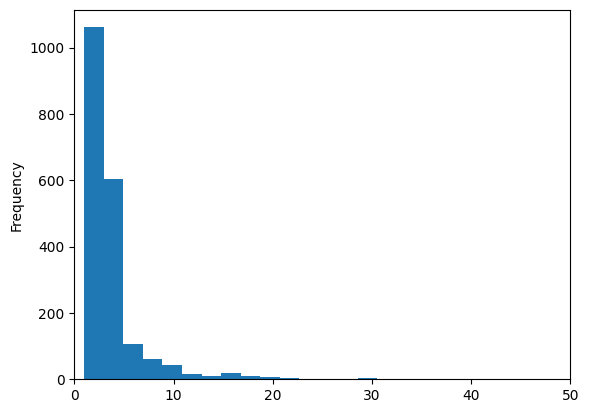

In [20]:
# api_df['function_name']
api_df['function_name'] = api_df['function_call'].apply(lambda x: x.split("(")[0] if ("(" in x) else "None")
plt.xlim((0,50))
api_df.groupby('function_name').count()['function_call'].sort_values(ascending=False).plot(kind='hist',bins=2000,)

In [21]:
api_df['prompt'] = api_df['instruction'] + "\n"+ api_df['input']

/tmp/ipykernel_49357/175619711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  api_df['prompt'] = api_df['instruction'] + "\n"+ api_df['input']


In [22]:
api_df.groupby('split').count()

api_df

,instruction,input,output,split,query_type,cleaned_output,instruction_query_type,function_calls,number_of_calls,function_call,function_name,prompt
2988,\nGenerate an API request in the format of [Ap...,"{""apiCode"": ""Get_All_Sessions"", ""description"":...",API-Request: [Get_All_Sessions()],train,API_request,[Get_All_Sessions()],Generate an API request in the format of [ApiN...,[Get_All_Sessions()],1,Get_All_Sessions(),Get_All_Sessions,\nGenerate an API request in the format of [Ap...
2989,\nGenerate an API request in the format of [Ap...,"{""apiCode"": ""Get_All_Sessions"", ""description"":...",API-Request: [Create_New_Session(session_name=...,train,API_request,"[Create_New_Session(session_name='Yin yoga', s...",Generate an API request in the format of [ApiN...,"[Create_New_Session(session_name='Yin yoga', s...",1,"Create_New_Session(session_name='Yin yoga', se...",Create_New_Session,\nGenerate an API request in the format of [Ap...
2990,\nGenerate an API request in the format of [Ap...,"{""apiCode"": ""get_device_compatibility"", ""descr...",API-Request: [get_device_details(device_name='...,train,API_request,[get_device_details(device_name='Blood Pressur...,Generate an API request in the format of [ApiN...,[get_device_details(device_name='Blood Pressur...,1,get_device_details(device_name='Blood Pressure...,get_device_details,\nGenerate an API request in the format of [Ap...
2991,\nGenerate an API request in the format of [Ap...,"{""apiCode"": ""get_appointments"", ""description"":...",API-Request: [schedule_appointment(patient_id=...,train,API_request,"[schedule_appointment(patient_id='user's ID', ...",Generate an API request in the format of [ApiN...,"[schedule_appointment(patient_id='user's ID', ...",1,"schedule_appointment(patient_id='user's ID', d...",schedule_appointment,\nGenerate an API request in the format of [Ap...
2992,\nGenerate an API request in the format of [Ap...,"{""apiCode"": ""send_help_alert"", ""description"": ...",API-Request: [get_nearby_hospital(location='四川...,train,API_request,"[get_nearby_hospital(location='四川北路, near 和平公园...",Generate an API request in the format of [ApiN...,"[get_nearby_hospital(location='四川北路, near 和平公园...",1,"get_nearby_hospital(location='四川北路, near 和平公园'...",get_nearby_hospital,\nGenerate an API request in the format of [Ap...
...,...,...,...,...,...,...,...,...,...,...,...,...
34859,\nGenerate an API request in the format of [Ap...,User: Can you help me query the meeting detail...,API-Request: [QueryMeeting(token='p9o8i7u6y5t4...,test,API_request,"[QueryMeeting(token='p9o8i7u6y5t4k3e2w1q', mee...",Generate an API request in the format of [ApiN...,"[QueryMeeting(token='p9o8i7u6y5t4k3e2w1q', mee...",1,"QueryMeeting(token='p9o8i7u6y5t4k3e2w1q', meet...",QueryMeeting,\nGenerate an API request in the format of [Ap...
34860,\nGenerate an API request in the format of [Ap...,User: Can you check my account balance?\nAI: S...,"API-Request: [GetUserToken(username='foo', pas...",test,API_request,"[GetUserToken(username='foo', password='bar')]",Generate an API request in the format of [ApiN...,"[GetUserToken(username='foo', password='bar')]",1,"GetUserToken(username='foo', password='bar')",GetUserToken,\nGenerate an API request in the format of [Ap...
34861,\nGenerate an API request in the format of [Ap...,User: Can you check my account balance?\nAI: S...,API-Request: [QueryBalance(token='z9x8c7v6b5n4...,test,API_request,[QueryBalance(token='z9x8c7v6b5n4m3q2w1')],Generate an API request in the format of [ApiN...,[QueryBalance(token='z9x8c7v6b5n4m3q2w1')],1,QueryBalance(token='z9x8c7v6b5n4m3q2w1'),QueryBalance,\nGenerate an API request in the format of [Ap...
34862,\nGenerate an API request in the format of [Ap...,User: Can you help me find some possible illne...,API-Request: [ToolSearcher(keywords='illness r...,test,API_request,[ToolSearcher(keywords='illness rash')],Generate an API request in the format of [ApiN...,[ToolSearcher(keywords='illness rash')],1,ToolSearcher(keywords='illnes

In [23]:
api_df = api_df.rename({'cleaned_output':'completion'},axis=1)
api_df['split'] = api_df['split'].apply(lambda x: 'eval' if x == 'train' and random.random() < 0.1 else x)
api_df.groupby('split').count()

,instruction,input,output,query_type,completion,instruction_query_type,function_calls,number_of_calls,function_call,function_name,prompt
split,,,,,,,,,,,
eval,1047,1047,1047,1047,1047,1047,1047,1047,1047,1047,1047
test,997,997,997,997,997,997,997,997,997,997,997
train,9321,9321,9321,9321,9321,9321,9321,9321,9321,9321,9321


In [24]:
api_df.to_csv(os.path.join(DATA_ROOT,'cleaned_api_bank_data.csv'))